### Linear Regression Model for Predictor in Residential Value 

- Singapore URA Real Estate Transactions Dataset
- 66,000 Historical Transactions of Private Property from 2017 to 2020
- Reduced Features Selection for Deployment to Dialogflow fulfillment

#### Data Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
0,TRILIVE,"1,758,000","1,162.51","1,512",1-Oct-17,113 TAMPINES ROAD #13-07,New Sale,Strata,108,"16,278",...,Condominium,1,Freehold,Uncompleted,Private,533902,19,53,North East Region,Hougang
1,SYMPHONY SUITES,"1,071,140","1,022.58","1,047",1-Oct-17,9 YISHUN CLOSE #13-18,New Sale,Strata,95,"11,275",...,Condominium,1,99 yrs from 10/06/2014,Uncompleted,HDB,768008,27,76,North Region,Yishun
2,SEASIDE RESIDENCES,"1,582,000",785.77,"2,013",1-Oct-17,16 SIGLAP LINK #22-26,New Sale,Strata,73,"21,671",...,Apartment,1,99 yrs from 18/04/2016,Uncompleted,Private,448872,15,44,East Region,Bedok
3,GEM RESIDENCES,"1,263,000",775.01,"1,630",1-Oct-17,3 LORONG 5 TOA PAYOH #03-11,New Sale,Strata,72,"17,542",...,Condominium,1,99 yrs from 21/09/2015,Uncompleted,HDB,319459,12,31,Central Region,Toa Payoh
4,PARC RIVIERA,"928,000",710.42,"1,306",1-Oct-17,101 WEST COAST VALE #27-10,New Sale,Strata,66,"14,061",...,Condominium,1,99 yrs from 11/11/2015,Uncompleted,N.A,126753,5,12,West Region,Clementi


In [4]:
df.shape

(66787, 21)

In [5]:
df.describe

<bound method NDFrame.describe of              Project Name Transacted Price ($) Area (SQFT) Unit Price ($ PSF)  \
0                 TRILIVE            1,758,000    1,162.51              1,512   
1         SYMPHONY SUITES            1,071,140    1,022.58              1,047   
2      SEASIDE RESIDENCES            1,582,000      785.77              2,013   
3          GEM RESIDENCES            1,263,000      775.01              1,630   
4            PARC RIVIERA              928,000      710.42              1,306   
...                   ...                  ...         ...                ...   
66782       PARC CLEMATIS            1,712,500    1,044.11              1,640   
66783       PARC CLEMATIS            1,732,500    1,044.11              1,659   
66784       PARC CLEMATIS            1,738,500    1,044.11              1,665   
66785       PARC CLEMATIS            1,438,500      861.12              1,670   
66786       PARC CLEMATIS            1,186,000      721.19              1,6

#### Features Selection

- Planning Area, ie Locality (Bedok, Tampines etc)
- Tenure (Freehold or Leasehold)
- Property Type (Condo, EC etc)
- Area Type (Strata or Landed)

- ##### Independant Variable: Unit Price in PSF

In [6]:
features = ['Unit Price ($ PSF)','Planning Area', 'Tenure', 'Property Type', 'Type of Area']

In [7]:
df1 = df[features]

In [8]:
df1.head()

,Unit Price ($ PSF),Planning Area,Tenure,Property Type,Type of Area
0,"1,512",Hougang,Freehold,Condominium,Strata
1,"1,047",Yishun,99 yrs from 10/06/2014,Condominium,Strata
2,"2,013",Bedok,99 yrs from 18/04/2016,Apartment,Strata
3,"1,630",Toa Payoh,99 yrs from 21/09/2015,Condominium,Strata
4,"1,306",Clementi,99 yrs from 11/11/2015,Condominium,Strata


In [9]:
df1.count()

Unit Price ($ PSF)    66787
Planning Area         66787
Tenure                66787
Property Type         66787
Type of Area          66787
dtype: int64

In [10]:
df1.columns=['UnitPrice','PlanArea','Tenure','PropertyType','AreaType']

In [11]:
df1.groupby('PlanArea').count()

,UnitPrice,Tenure,PropertyType,AreaType
PlanArea,,,,
Ang Mo Kio,920,920,920,920
Bedok,4420,4420,4420,4420
Bishan,1896,1896,1896,1896
Bukit Batok,1630,1630,1630,1630
Bukit Merah,2624,2624,2624,2624
Bukit Panjang,900,900,900,900
Bukit Timah,4039,4039,4039,4039
Changi,5,5,5,5
Choa Chu Kang,822,822,822,822


In [12]:
df1.head()

,UnitPrice,PlanArea,Tenure,PropertyType,AreaType
0,"1,512",Hougang,Freehold,Condominium,Strata
1,"1,047",Yishun,99 yrs from 10/06/2014,Condominium,Strata
2,"2,013",Bedok,99 yrs from 18/04/2016,Apartment,Strata
3,"1,630",Toa Payoh,99 yrs from 21/09/2015,Condominium,Strata
4,"1,306",Clementi,99 yrs from 11/11/2015,Condominium,Strata


#### Data Preparation

##### Convert all Tenure types to either Freehold or Leasehold to reduce complexity

In [13]:
df1.loc[df['Tenure'] !='Freehold', 'Tenure'] = 'Leasehold'

C:\Users\chung\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\chung\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [14]:
df1.head()

,UnitPrice,PlanArea,Tenure,PropertyType,AreaType
0,"1,512",Hougang,Freehold,Condominium,Strata
1,"1,047",Yishun,Leasehold,Condominium,Strata
2,"2,013",Bedok,Leasehold,Apartment,Strata
3,"1,630",Toa Payoh,Leasehold,Condominium,Strata
4,"1,306",Clementi,Leasehold,Condominium,Strata


##### Convert UnitPrice from string to float for Linear Regression Modelling

In [15]:
df1['UnitPrice'] = df1['UnitPrice'].str.replace(',', '').astype(float)

<ipython-input-15-f39ea1aeba2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['UnitPrice'] = df1['UnitPrice'].str.replace(',', '').astype(float)


In [16]:
df1.head()

,UnitPrice,PlanArea,Tenure,PropertyType,AreaType
0,1512.0,Hougang,Freehold,Condominium,Strata
1,1047.0,Yishun,Leasehold,Condominium,Strata
2,2013.0,Bedok,Leasehold,Apartment,Strata
3,1630.0,Toa Payoh,Leasehold,Condominium,Strata
4,1306.0,Clementi,Leasehold,Condominium,Strata


In [17]:
y=df1['UnitPrice']
X=df1[['PlanArea','Tenure','PropertyType','AreaType']]

In [18]:
print(y.shape)
print(X.shape)

(66787,)
(66787, 4)


In [19]:
X.head()

,PlanArea,Tenure,PropertyType,AreaType
0,Hougang,Freehold,Condominium,Strata
1,Yishun,Leasehold,Condominium,Strata
2,Bedok,Leasehold,Apartment,Strata
3,Toa Payoh,Leasehold,Condominium,Strata
4,Clementi,Leasehold,Condominium,Strata


##### One Hot Encoding for Categorical Data 
NB: pd.get_dummies method returns one coefficient for each categorical value rather than one less

In [20]:
X = pd.get_dummies(X)

In [21]:
X

,PlanArea_Ang Mo Kio,PlanArea_Bedok,PlanArea_Bishan,PlanArea_Bukit Batok,PlanArea_Bukit Merah,PlanArea_Bukit Panjang,PlanArea_Bukit Timah,PlanArea_Changi,PlanArea_Choa Chu Kang,PlanArea_Clementi,...,Tenure_Freehold,Tenure_Leasehold,PropertyType_Apartment,PropertyType_Condominium,PropertyType_Detached House,PropertyType_Executive Condominium,PropertyType_Semi-Detached House,PropertyType_Terrace House,AreaType_Land,AreaType_Strata
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66782,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
66783,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
66784,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
66785,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1


In [22]:
X.shape

(66787, 49)

In [23]:
y.shape

(66787,)

#### Train Linear Regression Model

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size =0.2, random_state=7)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

#### Model Evaluation

In [27]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_predict)
score

0.6051216417932486

##### R Square value at 0.61
NB: Limitation in accuracy due to reduced set of features 

Model Coefficients and Intercept from Linear Regression

In [28]:
model.coef_

array([-9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,
       -9.32562442e+13, -9.32562442e+13, -9.32562442e+13,  1.28156652e+15,
        1.28156652e+15,  9.28522352e+14,  9.28522352e+14,  9.28522352e+14,
        9.28522352e+14,  9.28522352e+14,  9.28522352e+14, -3.61423161e+14,
       -3.61423161e+14])

In [29]:
model.intercept_

-1755409468724532.8

#### Export Model in JSON for subsequent deployment to Dialogflow

In [30]:
import sys
!{sys.executable} -m pip install sklearn_export

Save as JSON File (Default file name is data.json)

In [31]:
# Save using sklearn_export
from sklearn_export import Export
export = Export(model)
result = export.to_json()

#### Visualising the Linear Regression Model & Predictions

In [32]:
y_predict.shape

(13358,)

In [33]:
y_test.shape

(13358,)

In [34]:
d = {'Prediction PSF':y_predict, 'Actual PSF': y_test}

In [35]:
output = pd.DataFrame(d)

In [36]:
output.head()

,Prediction PSF,Actual PSF
13870,1011.50,942.0
60817,1033.25,1049.0
60905,1094.75,1121.0
54061,1447.50,1486.0
38346,1908.25,2779.0


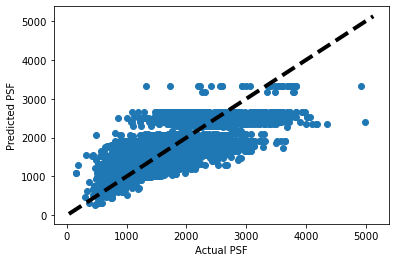

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual PSF')
ax.set_ylabel('Predicted PSF')
plt.show()

- Dotted black y=x 45 degree line illustrates ideal situation where all predicted values equal to actual values
- Blue dots represent the spread in terms of predicted and actual values

#### Prepare for JSON Object Construction

In [38]:
for i in model.coef_:
    print(i)

-93256244214866.88
-93256244214820.84
-93256244214474.97
-93256244214893.06
-93256244214247.0
-93256244214912.47
-93256244214361.72
-93256244214955.62
-93256244215133.05
-93256244214704.31
-93256244213747.22
-93256244214619.0
-93256244214845.53
-93256244214946.34
-93256244215007.88
-93256244214612.78
-93256244215219.38
-93256244214246.9
-93256244213846.25
-93256244213657.58
-93256244214351.05
-93256244212830.97
-93256244213866.25
-93256244215010.48
-93256244214811.9
-93256244214377.88
-93256244213489.23
-93256244214367.3
-93256244214860.81
-93256244214797.61
-93256244214684.44
-93256244214058.78
-93256244214429.0
-93256244215189.05
-93256244214775.75
-93256244214100.81
-93256244214420.97
-93256244215106.6
-93256244214993.69
1281566521830992.2
1281566521830988.8
928522351986515.0
928522351986370.5
928522351985630.8
928522351986172.4
928522351985687.5
928522351985876.5
-361423160876231.4
-361423160876819.25


In [39]:
df1.groupby('PlanArea').count()

,UnitPrice,Tenure,PropertyType,AreaType
PlanArea,,,,
Ang Mo Kio,920,920,920,920
Bedok,4420,4420,4420,4420
Bishan,1896,1896,1896,1896
Bukit Batok,1630,1630,1630,1630
Bukit Merah,2624,2624,2624,2624
Bukit Panjang,900,900,900,900
Bukit Timah,4039,4039,4039,4039
Changi,5,5,5,5
Choa Chu Kang,822,822,822,822


In [40]:
df1.groupby('Tenure').count()

,UnitPrice,PlanArea,PropertyType,AreaType
Tenure,,,,
Freehold,19181,19181,19181,19181
Leasehold,47606,47606,47606,47606


In [41]:
df1.groupby('PropertyType').count()

,UnitPrice,PlanArea,Tenure,AreaType
PropertyType,,,,
Apartment,26643,26643,26643,26643
Condominium,28831,28831,28831,28831
Detached House,663,663,663,663
Executive Condominium,5257,5257,5257,5257
Semi-Detached House,1621,1621,1621,1621
Terrace House,3772,3772,3772,3772


In [42]:
df1.groupby('AreaType').count()

,UnitPrice,PlanArea,Tenure,PropertyType
AreaType,,,,
Land,5092,5092,5092,5092
Strata,61695,61695,61695,61695


In [43]:
model.intercept_

-1755409468724532.8